In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.ToTensor()

In [ ]:
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)

In [ ]:
train_data = train_data
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)

In [ ]:
class CNN0(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.fc1 = nn.Linear(26*26*6, 10)

    def forward(self, x):
        x = F.sigmoid(self.conv1(x))
        x = x.flatten(start_dim=1)
        x = self.fc1(x)
        return F.log_softmax(x, dim=1)

In [ ]:
class CNN1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.fc1 = nn.Linear(26*26*6, 36)
        self.fc2 = nn.Linear(36,10)

    def forward(self, x):
        x = F.sigmoid(self.conv1(x))
        x = x.flatten(start_dim=1)
        x = F.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [ ]:
model0 = CNN0()
model1 = CNN1()

criterion = nn.CrossEntropyLoss()
optimizer0 = optim.SGD(model0.parameters(), lr=0.01)
optimizer1 = optim.SGD(model1.parameters(), lr=0.01)


In [ ]:
loss_list0 = []
loss_list1 = []

acc_list0 = []
acc_list1 = []

epoch_list = []

epochs = 100

In [ ]:
for i in range(epochs):

  corr0 = 0
  corr1 = 0
  loss0_tot = 0
  loss1_tot = 0
  tot = 0
  epoch_list.append(i)

  for b, (x, y) in enumerate(train_loader):

    y_pred0 = model0(x)
    y_pred1 = model1(x)

    loss0 = criterion(y_pred0, y)
    loss1 = criterion(y_pred1, y)

    loss0_tot += loss0.detach().numpy()
    loss1_tot += loss1.detach().numpy()

    predicted = torch.max(y_pred0, 1)[1]
    corr0 += (predicted == y).sum()

    predicted = torch.max(y_pred1, 1)[1]
    corr1 += (predicted == y).sum()

    tot += 10

    optimizer0.zero_grad()
    optimizer1.zero_grad()

    loss0.backward()
    loss1.backward()

    optimizer0.step()
    optimizer1.step()

  loss_list0.append(loss0_tot)
  loss_list1.append(loss1_tot)

  acc_list0.append(corr0/tot)
  acc_list1.append(corr1/tot)

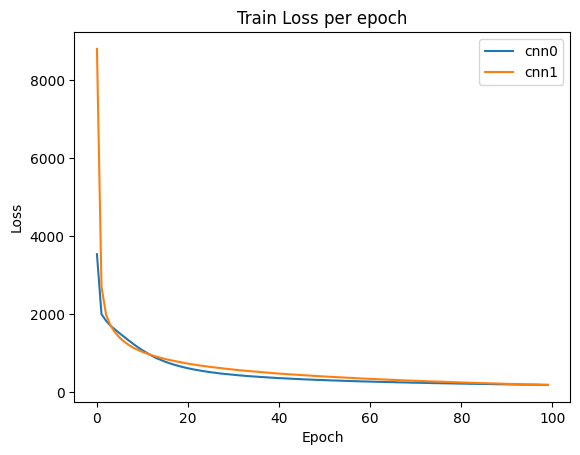

In [ ]:
plt.plot(epoch_list, loss_list0, label='cnn0')
plt.plot(epoch_list, loss_list1, label='cnn1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss per epoch')
plt.legend()
plt.show()

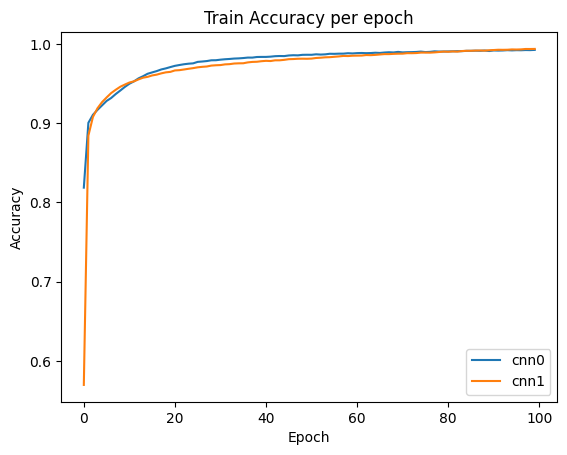

In [ ]:
plt.figure

plt.plot(epoch_list, acc_list0, label='cnn0')
plt.plot(epoch_list, acc_list1, label='cnn1')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train Accuracy per epoch')
plt.legend()
plt.show()